# --------- ASSIGNMENT 11 (AI) - NEURAL NETWORK FROM SCRATCH -----------

### Neural Network Assignment:

  * Understanding of neural network is crucial for deep learning journey. So, in this assignment you need to implement a neural network from scratch, without TensorFlow or Keras with following components:

    * Input Layer
    * 1 Hidden Layer
    * Output Layer
    * Weights
    * Biases
    * Activation Function

  * Sigmoid

    * Forward Propagation
    * Backward Propagation

In [94]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
# Sigmoid activation fuction

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [96]:
# Derivative of sigmoid

def sigmoid_derivative(x):
    return x * (1 - x)

In [97]:
# Input and output data

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0],[1],[1],[0]])

In [98]:
# Initialize weights and biases

np.random.seed(1)
input_neutrons = 2
hidden_neutrons = 3
output_neutrons = 1

In [99]:
# Weights

w1 = np.random.rand(input_neutrons, hidden_neutrons)
w2 = np.random.rand(hidden_neutrons, output_neutrons)

In [100]:
# Biases

b1 = np.random.rand(1, hidden_neutrons)
b2 = np.random.rand(1, output_neutrons)

In [101]:
learning_rate = 0.1
epochs = 10000

loss_list = []
accuracy_list = []

In [102]:
# Training Neural Network

for epoch in range(epochs):

  # ---- Forward Propogation -----

  hidden_input = np.dot(X, w1) + b1
  hidden_output = sigmoid(hidden_input)

  final_input = np.dot(hidden_output, w2) + b2
  predicted_output = sigmoid(final_input)

  # ---- Loss ----

  loss = np.mean((y - predicted_output) ** 2)
  loss_list.append(loss)

  # ---- Accuracy ----
  predictions = (predicted_output > 0.5).astype(int)
  accuracy = np.mean(predictions == y)
  accuracy_list.append(accuracy)

  # ---- Backward Propogation ----

  error = y - predicted_output
  d_output = error * sigmoid_derivative(predicted_output)

  error_hidden = d_output.dot(w2.T)
  d_hidden = error_hidden * sigmoid_derivative(hidden_output)

  # ---- Update weights and biases ----

  w2 += hidden_output.T.dot(d_output) * learning_rate
  b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

  w1 += X.T.dot(d_hidden) * learning_rate
  b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Final Output

print('final Prdicted Output:')
print(predicted_output)

final Prdicted Output:
[[0.07368868]
 [0.93449741]
 [0.93521637]
 [0.0698939 ]]


This neural network was built completely from scratch using:

* Manual weight initialization

* Sigmoid activation

* Forward propagation

* Backward propagation

* Gradient descent

No deep learning libraries were used, fulfilling the assignment requirements.

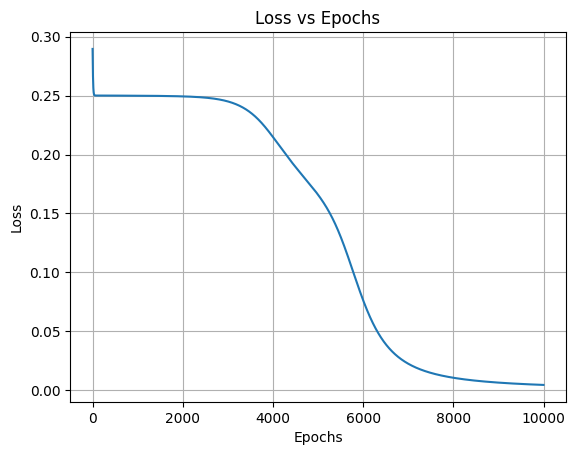

In [103]:
# Plot loss and epochs

plt.figure()
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show(block=True)

* X-axis: Epochs (training iterations)

* Y-axis: Loss (error)

* Curve goes downward ⬇️

* Means model is learning and improving

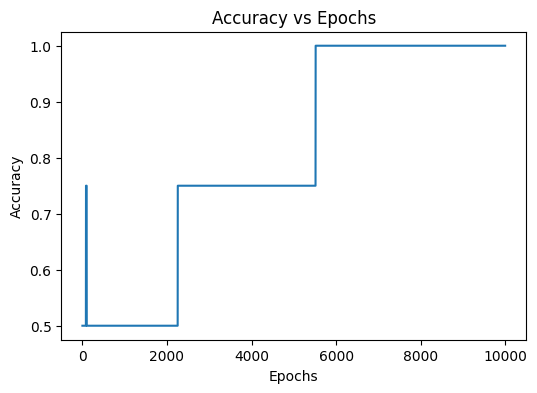

In [104]:
# Plot Accuracy vs Epochs

plt.figure(figsize=(6,4))
plt.plot(accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

* Accuracy starts low (around 0.5)

* Gradually increases

* Reaches close to 1.0 (100%)